In [36]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import lightgbm as lgb

In [37]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [38]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, )
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).reshape(-1, )
y_test_enc = enc.transform(y_test.reshape(-1, 1)).reshape(-1, )
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1)).reshape(-1, )
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025,)


In [39]:
# 不需要指定num_class参数
model = LGBMClassifier(
    boosting_type='gbdt',  # 对应boosting
    objective='multiclass',
    n_jobs=-1,
    max_depth=-1,
    min_child_weight=1e-3,
    min_child_samples=20,
    num_leaves=31,
    subsample=1.0,
    subsample_freq=0,
    learning_rate=0.1,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    n_estimators=100)

In [40]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应valid_sets
          sample_weight=1 / (1 + y_train_enc),  # 对应Dataset(weight)
          eval_metric='multiclass',  # 对应metric+feval
          callbacks=[lgb.early_stopping(100),
                     lgb.log_evaluation(10)],
          categorical_feature=[0, 1]  # 对应Dataset(categorical_feature)
          )

Training until validation scores don't improve for 100 rounds
[10]	training's multi_logloss: 0.539461	valid_1's multi_logloss: 0.739649
[20]	training's multi_logloss: 0.305268	valid_1's multi_logloss: 0.556365
[30]	training's multi_logloss: 0.182832	valid_1's multi_logloss: 0.507673


C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[40]	training's multi_logloss: 0.117077	valid_1's multi_logloss: 0.481155
[50]	training's multi_logloss: 0.0772842	valid_1's multi_logloss: 0.477927
[60]	training's multi_logloss: 0.0511849	valid_1's multi_logloss: 0.484929
[70]	training's multi_logloss: 0.0345667	valid_1's multi_logloss: 0.492579
[80]	training's multi_logloss: 0.0238417	valid_1's multi_logloss: 0.507314
[90]	training's multi_logloss: 0.0166043	valid_1's multi_logloss: 0.524041
[100]	training's multi_logloss: 0.0115204	valid_1's multi_logloss: 0.539894
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0115204	valid_1's multi_logloss: 0.539894


LGBMClassifier(objective='multiclass')

In [41]:
# 预测结果(num_sample, )
model.predict(X_test)

array([3., 5., 2., 6., 0., 0., 1., 1., 0., 4., 1., 1., 4., 6., 4., 4., 1.,
       1., 4., 4., 0., 1., 5., 4., 1., 2., 1., 4., 3., 1., 1., 2., 1., 3.,
       0., 4., 0., 2., 4., 3., 1., 5., 0., 4., 1., 2., 0., 5., 1., 5., 4.,
       1., 6., 1., 4., 0., 4., 0., 6., 1., 1., 4., 1., 4., 1., 4., 0., 3.,
       5., 1., 1., 4., 0., 4., 1., 2., 0., 3., 4., 0., 4., 4., 0., 4., 4.,
       1., 4., 2., 4., 2., 4., 4., 1., 0., 1., 6., 4., 0., 1., 4., 1., 4.,
       0., 1., 1., 1., 0., 2., 4., 4., 5., 1., 4., 1., 4., 1., 1., 1., 1.,
       0., 1., 5., 4., 4., 2., 0., 4., 0., 1., 6., 4., 0., 4., 5., 5., 1.,
       1., 0., 1., 1., 2., 0., 3., 1., 5., 4., 1., 3., 0., 1., 4., 0., 0.,
       1., 0., 1., 2., 4., 6., 4., 0., 4., 4., 3., 4., 0., 2., 0., 2., 1.,
       5., 4., 2., 4., 5., 1., 0., 2., 6., 4., 1., 0., 1., 1., 0., 4., 4.,
       1., 1., 1., 4., 1., 2., 4., 5., 1., 1., 1., 1., 4., 1., 6., 6., 4.,
       1., 1., 5., 4., 6., 0., 0., 1., 1., 4., 1., 0., 4., 1., 2., 0., 1.,
       1., 0., 1., 0., 1.

In [42]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[7.10974557e-06, 3.64727187e-05, 6.25161142e-06, ...,
        8.02662335e-07, 7.96691684e-06, 2.59997922e-09],
       [3.90810812e-03, 3.75766364e-03, 8.83785029e-06, ...,
        1.70052280e-02, 9.75319218e-01, 3.70915640e-07],
       [1.09318463e-03, 1.95396168e-02, 8.90701499e-01, ...,
        1.47094890e-04, 8.84975834e-02, 3.69756452e-06],
       ...,
       [1.26482067e-04, 4.65056301e-03, 3.06306459e-06, ...,
        9.95214898e-01, 4.19501981e-06, 3.01481075e-07],
       [9.61158470e-01, 3.85877556e-02, 3.02781671e-06, ...,
        2.04506006e-04, 1.07884696e-05, 3.36567938e-05],
       [8.46784573e-01, 1.53002290e-01, 9.76241447e-06, ...,
        1.90862681e-04, 6.33343986e-06, 2.33390961e-06]])

In [43]:
# 准确率
model.score(X_test, y_test)

0.08

In [44]:
# 对应vals_result
model.evals_result_

{'training': OrderedDict([('multi_logloss',
               [1.1561551880416103,
                1.0231784217447917,
                0.9215532298075977,
                0.839746662952777,
                0.7711498246602154,
                0.712617973752986,
                0.6606118937280026,
                0.6151070946559782,
                0.5758164843332558,
                0.5394608762966535,
                0.507393455967087,
                0.4776522081998148,
                0.45099702229363897,
                0.42787510678739954,
                0.4053016939862736,
                0.3851596261253566,
                0.3621042987849802,
                0.3418509221763085,
                0.32281899662415864,
                0.30526755198891103,
                0.2888317222005251,
                0.2732321925084135,
                0.2592365725333679,
                0.24483969035901526,
                0.2329051678581431,
                0.2222033865458336,
                0.

In [45]:
# 特征相对重要性
model.feature_importances_

array([  84,  168, 1104, 2121, 1954, 3636, 2080, 1986, 1775, 3488,  181,
          0,  123,  217,  150,   49,    0,    0,   25,    0,    0,    0,
          0,  116,    0,  164,   30,    0,    0,    0,   37,   19,    0,
         79,    0,   78,  101,   29,    0,    0,    0,    0,  173,  204,
          9,    0,   49,    0,    0,    0,    0,  168,  236,    0])

In [46]:
# The underlying Booster of this model.
model.booster_

In [47]:
# 保存训练好的模型
model.booster_.save_model("lgb1.model")

In [48]:
import lightgbm as lgb

# 加载训练好的模型
bst = lgb.Booster(model_file='lgb1.model')
bst

In [49]:
bst.predict(X_test) - model.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

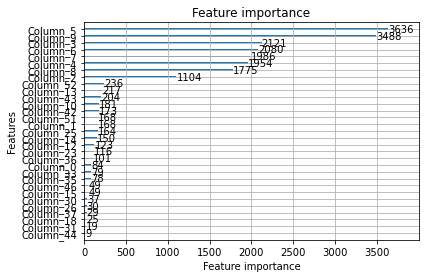

In [50]:
import matplotlib.pyplot as plt

# 绘制特征的相对重要性
lgb.plot_importance(model)
plt.show()

In [51]:
# 可视化lgb分割过程
img = lgb.create_tree_digraph(model)

In [52]:
type(img)

graphviz.dot.Digraph